In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [14]:
matrix = cv2.imread(r"C:\Users\alepa\Desktop\Data Science\[1] 2nd Semester\Mathematical Models and Numerical Methods for Big Data\Code\eagle.png", cv2.IMREAD_GRAYSCALE)

A = np.array(matrix)


In [15]:
# compute and store the SVD of A as matrices U, s and V transpose,

U, Σ, Vt = np.linalg.svd(A, full_matrices=False) 

largest_sigma = np.argsort(Σ)[-10:]     # and pick the 10 biggest singular values through list manipulation


In [16]:
# the definition of the interpolation matrix (given rank-10) is the following
P = np.dot(U[:, :10], np.dot(np.diag(Σ[:10]), Vt[:10, :]))

In [17]:
# we keep only the first 10 singular values to make a rank-10 approximation
U_approx = U[:, :10]
Σ_approx = np.diag(Σ[:10])
Vt_approx = Vt[:10, :]

# and so the resulting matrix is the dot product
A_approx = np.dot(U_approx, np.dot(Σ_approx, Vt_approx))


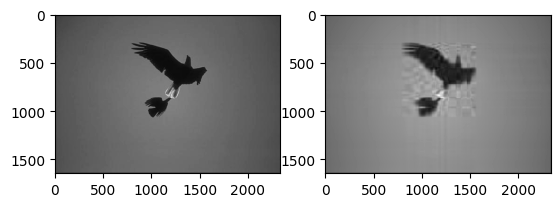

In [18]:
# plotting
plt.subplot(1, 2, 1)
plt.imshow(A, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(A_approx, cmap='gray')

plt.show()


# -----



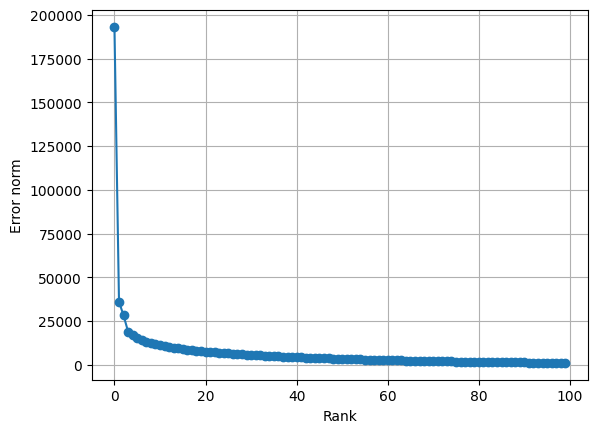

In [19]:
# store errors in a list, then loop over the matrices for plotting
errors = []

for k in range(0, 100): # loop over the first 100 columns
    U_k = U[:, :k] # truncated U
    Σ_k = np.diag(Σ[:k]) # truncated Σ
    Vt_k = Vt[:k, :] # truncated V transpose
    A_k = np.dot(U_k, np.dot(Σ_k, Vt_k))
    e = np.linalg.norm(A - A_k, 'fro')
    errors.append(e)



plt.plot(range(0, 100), errors, marker='o')
plt.xlabel('Rank')
plt.ylabel('Error norm')
plt.grid(True)
plt.show()
